## Dendritic spine analysis for neuronstudio outputs

Some useful functions and templates to perform dendritic spine analysis of data generated by neuronstudio. Neuronstudio spine info output files can be saved as .txt files for each dendritic segment. Before analysis can be performed, .txt files need to be combined (for example by using the combine_files function defined in a seperate notebook). For the analysis performed below, this step has been performed and information for all spines are combined and saved in .csv files for each experimental group.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import euclidean_distances #needed for nearest neighbor/min distances analyis
from sklearn.cluster import DBSCAN #for clustering analysis
from scipy import stats
%matplotlib inline

In [2]:
# import spine data for each group and store as a pandas DataFrame

M_HC_DRN = pd.read_csv('head diameter csvs/M_HC_DRN.csv')
M_HC_neg = pd.read_csv('head diameter csvs/M_HC_neg.csv')
F_HC_DRN = pd.read_csv('head diameter csvs/F_HC_DRN.csv')
F_HC_neg = pd.read_csv('head diameter csvs/F_HC_neg.csv')

In [34]:
#example of what the data should look like
M_HC_DRN.head()

,Unnamed: 0,ID,SECTION-NUMBER,section_length,BRANCH-ORDER,X,Y,Z,head_diameter,neck_diameter,...,XYPLANE-ANGLE,SWC-NODE-ID,SWC-NODE-OFFSET,ATTACH-X,ATTACH-Y,ATTACH-Z,SOMA-DISTANCE,segment,animal,neuron
0,60,60,0,40.660000,NaN,14.181243,4.059513,6.211911,0.0033,NaN,...,74.917552,51,0.417538,14.235135,4.245377,6.930000,17.896643,10_BM10 N10S2.oib.txt,BM10,N10S2
1,138,138,0,14.871739,NaN,20.555826,25.654324,7.463107,0.0033,NaN,...,80.977398,16,0.125502,20.436758,25.616440,8.250000,7.863744,10_BM10 N3S2.oib.txt,BM10,N3S2
2,91,91,0,26.252407,NaN,28.317223,5.242963,6.189742,0.0033,NaN,...,62.086356,55,0.000000,28.517002,5.157363,6.600001,20.049063,10_BM10 N3S3.oib.txt,BM10,N3S3
3,16,16,0,5.524887,NaN,26.88809,0.435232,4.29,0.0033,NaN,...,-50.293154,10,0.000000,27.656555,1.216903,2.970000,4.216601,10_BM10 N5S2.oib.txt,BM10,N5S2
4,46,48,1,40.231255,NaN,19.476236,8.342301,4.928425,0.0033,NaN,...,81.831267,40,0.741605,19.551682,8.280011,5.610000,9.435739,10_BM10 N5S2.oib.txt,BM10,N5S2


## Head diameter analysis

Example will show thin spine head diameter analysis only, but can be performed on mushroom spines and thin+mushroom spines as well.

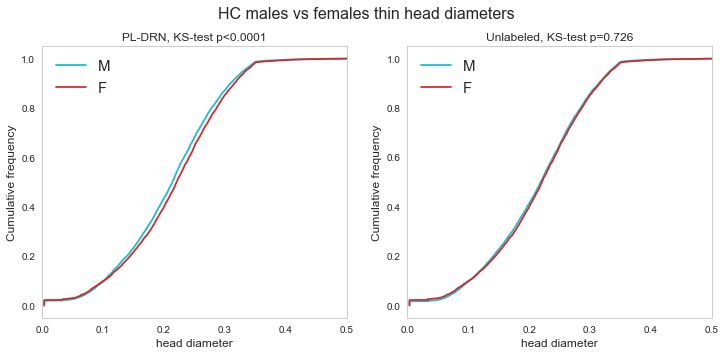

In [9]:
#plot cumulative distribution for thin spine head diameters 
sns.set_style('whitegrid',{'axes.grid' : False}) #changes default styles
F_color = (214/255,39/255,40/255) #RGB colors
M_color = (23/255,190/255,207/255)

M_HC_DRN_thin = M_HC_DRN[M_HC_DRN.TYPE == 'thin'] #use only thin spines
F_HC_DRN_thin = F_HC_DRN[F_HC_DRN.TYPE == 'thin']
M_HC_neg_thin = M_HC_neg[M_HC_neg.TYPE == 'thin']
F_HC_neg_thin = F_HC_neg[F_HC_neg.TYPE == 'thin']

x_MDRN = np.sort(M_HC_DRN_thin['head_diameter'])  #sets up values to be plotted 
y_MDRN = np.arange(1, len(x_MDRN)+1) / len(x_MDRN)
x_FDRN = np.sort(F_HC_DRN_thin['head_diameter'])
y_FDRN = np.arange(1, len(x_FDRN)+1) / len(x_FDRN)

x_Mneg = np.sort(M_HC_neg_thin['head_diameter'])
y_Mneg = np.arange(1, len(x_Mneg)+1) / len(x_Mneg)
x_Fneg = np.sort(F_HC_DRN_thin['head_diameter'])
y_Fneg = np.arange(1, len(x_Fneg)+1) / len(x_Fneg)


fig = plt.figure(figsize=(12,5)) #set up figure instance and define figure size

fig.suptitle('HC males vs females thin head diameters',fontsize=16,y=0.99)



ax2 = fig.add_subplot(1,2,1)
ax2.plot(x_MDRN, y_MDRN, c= M_color, label='M')
ax2.plot(x_FDRN, y_FDRN, c=F_color, label='F')
ax2.set_xlabel('head diameter', fontsize=12)
ax2.set_ylabel('Cumulative frequency',fontsize=12)
ax2.set_xlim([0,0.5])
ax2.legend(fontsize=15)
ax2.set_title('PL-DRN, KS-test p<0.0001') # p value based on KS-test performed in cells below

ax3 = fig.add_subplot(1,2,2, sharex=ax2)
ax3.plot(x_Mneg, y_Mneg, c=M_color, label='M')
ax3.plot(x_Fneg, y_Fneg, c=F_color, label='F')
ax3.set_xlim([0,0.5])
ax3.set_xlabel('head diameter',fontsize=12)
ax3.set_ylabel('Cumulative frequency',fontsize=12)
ax3.legend(fontsize=15)
ax3.set_title('Unlabeled, KS-test p=0.726')



#plt.savefig('HC males vs females thin spine hd.tiff',dpi=300)  <-uncomment to save figure
plt.show()



In [8]:
print(stats.ks_2samp(M_HC_DRN_thin['head_diameter'], F_HC_DRN_thin['head_diameter']))
print(stats.ks_2samp(M_HC_neg_thin['head_diameter'], F_HC_neg_thin['head_diameter']))

Ks_2sampResult(statistic=0.044337168046158171, pvalue=3.9230145048310296e-06)
Ks_2sampResult(statistic=0.01007024668020251, pvalue=0.72567208800457028)


C:\Users\tinag\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


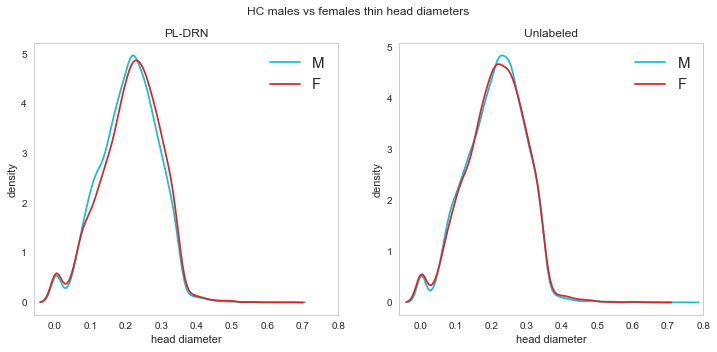

In [10]:
# a different way to look at differences in distribution is a kernel density estimate plot. 

fig = plt.figure(figsize=(12,5))
fig.suptitle('HC males vs females thin head diameters')
ax1 = fig.add_subplot(1,2,1)
sns.distplot(M_HC_DRN_thin['head_diameter'],hist=False,kde=True,color=M_color,label='M',ax=ax1,)
sns.distplot(F_HC_DRN_thin['head_diameter'],hist=False,kde=True,color=F_color,label='F',ax=ax1)
ax1.set_xlim([-0.06,0.8])
ax1.set_title('PL-DRN')
ax1.set_xlabel('head diameter')
ax1.set_ylabel('density')
plt.legend(fontsize=15)

ax2 = fig.add_subplot(1,2,2)
sns.distplot(M_HC_neg_thin['head_diameter'],hist=False,color=M_color,label='M',ax=ax2)
sns.distplot(F_HC_neg_thin['head_diameter'],hist=False,color=F_color,label='F',ax=ax2)
#ax2.set_xlim([0,1.0])
ax2.set_xlim([-0.06,0.8])
ax2.set_title('Unlabeled')
ax2.set_xlabel('head diameter')
ax2.set_ylabel('density')
plt.legend(fontsize=15)


#plt.savefig('KDE females vs males thin hd.tiff',dpi=300)
plt.show()

C:\Users\tinag\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


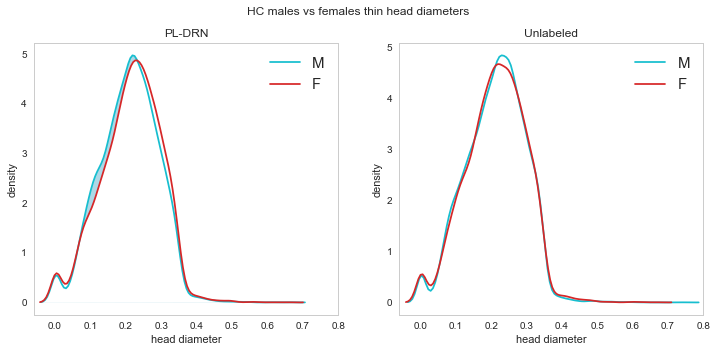

In [26]:
fig = plt.figure(figsize=(12,5))
fig.suptitle('HC males vs females thin head diameters')
ax1 = fig.add_subplot(1,2,1)
sns.distplot(M_HC_DRN_thin['head_diameter'],hist=False,kde=True,color=M_color,label='M',ax=ax1,)
sns.distplot(F_HC_DRN_thin['head_diameter'],hist=False,kde=True,color=F_color,label='F',ax=ax1)
ax1.set_xlim([-0.06,0.8])
ax1.set_title('PL-DRN')
ax1.set_xlabel('head diameter')
ax1.set_ylabel('density')
plt.legend(fontsize=15)

#to shade area where values from one group are higher than the other
line = ax1.lines[0]
line2 = ax1.lines[1]
y1 = (line.get_ydata())
y2 = (line2.get_ydata())
x1 = line.get_xdata()
x2 = line2.get_xdata()
y3 = (line.get_ydata())
y4 = (line2.get_ydata())
x3 = line.get_xdata()
x4 = line2.get_xdata()
ax1.fill(x1,y1,'lightblue',x2,y2,'w')



ax2 = fig.add_subplot(1,2,2)
sns.distplot(M_HC_neg_thin['head_diameter'],hist=False,color=M_color,label='M',ax=ax2)
sns.distplot(F_HC_neg_thin['head_diameter'],hist=False,color=F_color,label='F',ax=ax2)
#ax2.set_xlim([0,1.0])
ax2.set_xlim([-0.06,0.8])
ax2.set_title('Unlabeled')
ax2.set_xlabel('head diameter')
ax2.set_ylabel('density')
plt.legend(fontsize=15)


#plt.savefig('KDE females vs males thin hd.tiff',dpi=300)
plt.show()

## Minimum distance to nearest neighbor(s)

To look at one measure of clustering of spines, we can look at the distance of each spine to its closest neighboring spine (or closest 2 neighboring spines). Neuronstudio output files include X,Y,Z coordinates of center of mass for each spine. These coordinates will be used to get euclidean distances for each spine. Analysis has to be performed for each segment and min distance values for each spine will be compiled. 

In [31]:
def min_distances(data):
    """Return distance to closest neighboring spine for each spine.
    
       data -- DataFrame with dendritic spine data from neuronstudio and added segment column that identifies 
               which segement the spine comes from."""
    
    segments = data.segment.unique()
    combined = pd.DataFrame()
    for filename in segments:
        df = data[data.segment == filename]
        length = df.section_length.unique().sum()
        spines = len(df)
        expected_distance = length/spines
        location = np.array(df.loc[:, ['X','Y','Z']])
        distances = pd.DataFrame(euclidean_distances(location,location))
        min_distances = distances[distances > 0].min(axis=1) / expected_distance
        frame = [combined,min_distances]
        combined = pd.concat(frame)
        
    return combined

def two_min_distances(data):
    """Return average distance to the two closest neighboring spines for each spine.
    
       data -- DataFrame with dendritic spine data from neuronstudio and added segment column that identifies 
               which segement the spine comes from."""
    segments = data.segment.unique()
    combined = pd.DataFrame()
    for filename in segments:
        df = data[data.segment == filename]
        length = df.section_length.unique().sum()
        spines = len(df)
        expected_distance = length/spines
        location = np.array(df.loc[:, ['X','Y','Z']])
        distances = np.array(euclidean_distances(location,location))
        sorted_distances = np.sort(distances)
        min_distances = pd.DataFrame(sorted_distances[:,1:3]).mean(axis=1) / expected_distance
        frame = [combined,min_distances]
        combined = pd.concat(frame)
        
    return combined

In [32]:
F_DRN_min_thin = min_distances(F_HC_DRN_thin)
F_neg_min_thin = min_distances(F_HC_neg_thin)
M_DRN_min_thin = min_distances(M_HC_DRN_thin)
M_neg_min_thin = min_distances(M_HC_neg_thin)

C:\Users\tinag\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


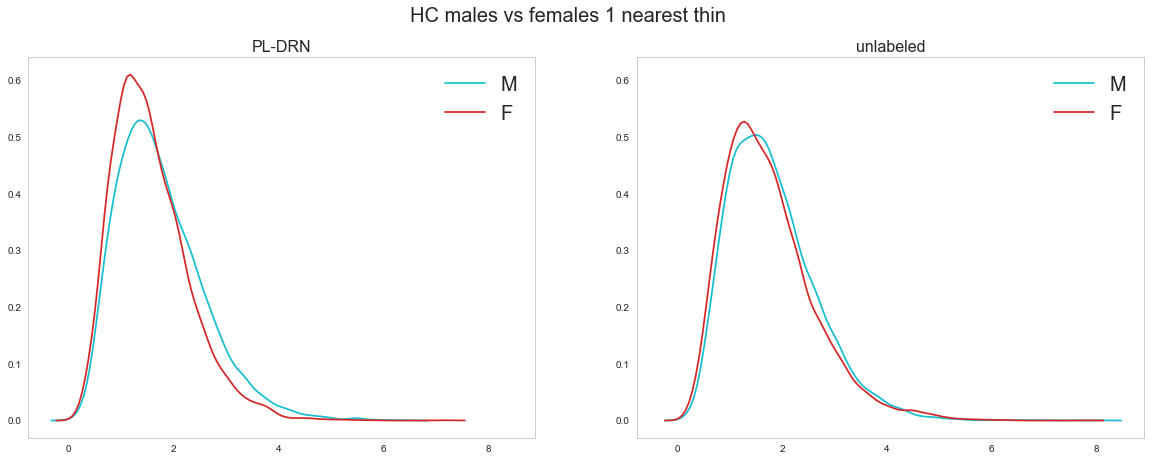

In [24]:
#plot distributions of min distances

fig = plt.figure(figsize=(20,7))
fig.suptitle('HC males vs females 1 nearest thin',fontsize=20)
ax1 = fig.add_subplot(1,2,1)
sns.distplot(M_DRN_min_thin, hist=False, label='M', color=M_color)
sns.distplot(F_DRN_min_thin, label='F',hist=False, color=F_color)
#plt.axis([0,5.5,0,0.8])
plt.legend(fontsize=20)
plt.title('PL-DRN',fontsize=16)


ax2 = fig.add_subplot(1,2,2,sharex=ax1, sharey=ax1)
sns.distplot(M_neg_min_thin, hist=False, label='M',color=M_color)
sns.distplot(F_neg_min_thin, hist=False, label='F', color=F_color)
plt.legend(fontsize=20)
plt.title('unlabeled',fontsize=16)

plt.show()


## Additional clustering analysis
The above analysis only tells us how close the nearest neighbor is, but we don't know if that means spines are arranged in pairs or in larger clusters. Another way of looking at clustering is to use DBSCAN to see how many spines are in a cluster on average. Two values need to be defined: minimum number of spines in a cluster to be considered a cluster (in this example I chose 2, but 3 would work as well), and maximum distance(eps) between a spine and another spine to be considered part of the cluster. This value is difficult to choose. For this example I chose 1.79 micro meters, because that is the average (non-normalized) minimum distance for two of the groups.   

In [33]:
from collections import Counter
def cluster_size(data):
    """Return average number of spines in a cluster on each segment.
       
       data -- DataFrame with dendritic spine data from neuronstudio and added segment column that identifies 
               which segement the spine comes from."""
    
    segments = data.segment.unique()
    all_cluster_size = []
    for filename in segments:
        df = data[data.segment == filename]
        total_spines = len(df)    
        location = np.array(df.loc[:, ['X','Y','Z']])
        db = DBSCAN(eps=1.79, min_samples=2).fit(location)
        labels = db.labels_
        counted = Counter(labels)
        del counted[-1]
        if len(counted) > 0:
            cluster_size = np.mean(list(counted.values()))
            all_cluster_size.append(cluster_size)
        
    return all_cluster_size

In [28]:
F_DRN_cs = cluster_size(F_HC_DRN_thin)
F_neg_cs = cluster_size(F_HC_neg_thin)
M_DRN_cs = cluster_size(M_HC_DRN_thin)
M_neg_cs = cluster_size(M_HC_neg_thin)

In [29]:
print(np.mean(F_DRN_cs))
print(np.mean(F_neg_cs))
print(np.mean(M_DRN_cs))
print(np.mean(M_neg_cs))

3.32151870982
3.55096560803
3.6454527217
3.6533510403


## Analysis based on additional variables, for example estrous cycle
Ways to look for effects of additional variables through visualization. Also showing a way to easily add variables to spine data so grouping by variable is possible.

In [36]:
#load in new data set that includes animal name and estrous cycle info for each animal.
#This example inlcudes spine density data but if only estrous stage info is needed, animal name and estrous stage is enough
df = pd.read_csv('Female estrous spines.csv')
df.head()

,animal,stress,thin_DRN,thin_neg,mush_DRN,mush_neg,estrous
0,BF54,IS,0.775380,0.987385,0.210669,0.263222,P
1,BF52,ES,0.735815,0.959195,0.258580,0.293858,P
2,BF33,ES,1.046190,1.163167,0.245352,0.297376,P
3,BF50,HC,0.905936,0.947902,0.279380,0.228465,P
4,BF53,IS,0.734008,0.965500,0.235745,0.262671,E


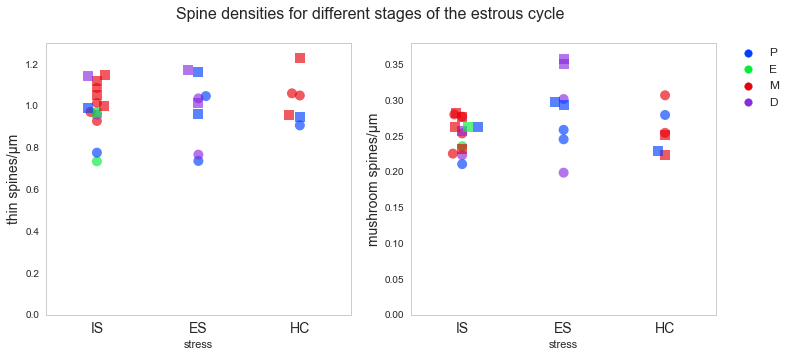

In [38]:
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(1,2,1)
fig.suptitle('Spine densities for different stages of the estrous cycle',fontsize=16)
sns.swarmplot(x='stress', y='thin_DRN', data=df, hue='estrous',ax=ax1, size=10,marker='o', alpha=0.65,palette='bright')
ax1.set_ylim([0,1.3])
ax1.set_xticklabels(labels=['IS','ES','HC'],fontsize=14)
sns.swarmplot(x='stress', y='thin_neg', data=df, hue='estrous', size=10, marker='s',alpha=0.65,ax=ax1, palette='bright')
ax1.set_ylabel('thin spines/μm',fontsize=14)
handles, labels = ax1.get_legend_handles_labels()


ax2 = fig.add_subplot(1,2,2)
sns.swarmplot(x='stress', y='mush_DRN', data=df, hue='estrous',ax=ax2, size=10,marker='o',alpha=0.65,palette='bright')
sns.swarmplot(x='stress', y='mush_neg', data=df, hue='estrous',ax=ax2, size=10,marker='s',alpha=0.65,palette='bright')
ax2.set_ylim([0,0.38])
ax2.set_ylabel('mushroom spines/μm',fontsize=14)
ax2.set_xticklabels(labels=['IS','ES','HC'],fontsize=14)
handles, labels = ax2.get_legend_handles_labels()

ax1.legend_.remove()

plt.legend(handles[:4], labels[:4],bbox_to_anchor=(1.05, 1), loc=2, fontsize= 12,borderaxespad=0.)
#plt.savefig('Estrous cicle spines.tiff',dpi=300)
plt.show()

This plot helps to visualize potential differences based on estrous cycle, especially when there isn't enough data to perform statistical analyses

**Next, add estrous info to data for individual spines to look at head diameters based on estrous cycle**

In [40]:
F_ES_DRN = pd.read_csv('head diameter csvs/F_ES_DRN.csv')
F_IS_DRN = pd.read_csv('head diameter csvs/F_IS_DRN.csv')

F_ES_neg = pd.read_csv('head diameter csvs/F_ES_neg.csv')
F_IS_neg = pd.read_csv('head diameter csvs/F_IS_neg.csv')


#keep only data from animals where I have estrous cycle information
animals = list(df.animal)
F_ES_DRN = F_ES_DRN[F_ES_DRN.animal.isin(animals)]
F_IS_DRN = F_IS_DRN[F_IS_DRN.animal.isin(animals)]
F_HC_DRN = F_HC_DRN[F_HC_DRN.animal.isin(animals)]
F_ES_neg = F_ES_neg[F_ES_neg.animal.isin(animals)]
F_IS_neg = F_IS_neg[F_IS_neg.animal.isin(animals)]
F_HC_neg = F_HC_neg[F_HC_neg.animal.isin(animals)]

In [41]:
df_estrous = df[['animal','estrous']]

#merge estrous data with spine data 
F_ES_DRN = pd.merge(F_ES_DRN,df_estrous,on='animal',how='inner')
F_IS_DRN = pd.merge(F_IS_DRN,df_estrous,on='animal',how='inner')
F_HC_DRN = pd.merge(F_HC_DRN,df_estrous,on='animal',how='inner')
F_ES_neg = pd.merge(F_ES_neg,df_estrous,on='animal',how='inner')
F_IS_neg = pd.merge(F_IS_neg,df_estrous,on='animal',how='inner')
F_HC_neg = pd.merge(F_HC_neg,df_estrous,on='animal',how='inner')

In [42]:
F_ES_DRN.head()

,Unnamed: 0,ID,SECTION-NUMBER,section_length,BRANCH-ORDER,X,Y,Z,head_diameter,neck_diameter,...,SWC-NODE-ID,SWC-NODE-OFFSET,ATTACH-X,ATTACH-Y,ATTACH-Z,SOMA-DISTANCE,segment,animal,neuron,estrous
0,1,1,0,37.221363,NaN,5.99113,26.808701,7.419472,0.421575,0.003300,...,65,0.000000,5.071104,26.856352,4.950000,28.818710,10_BF33 N11S1.oib.txt,BF33,N11S1,P
1,2,2,0,37.221363,NaN,3.545391,11.603571,6.269167,0.452769,0.003300,...,20,0.000000,5.616839,12.179447,4.950000,9.710042,10_BF33 N11S1.oib.txt,BF33,N11S1,P
2,3,3,0,37.221363,NaN,2.757883,32.078697,7.736818,0.442847,0.003300,...,80,0.000999,4.244884,32.731667,6.600001,36.814125,10_BF33 N11S1.oib.txt,BF33,N11S1,P
3,4,4,0,37.221363,NaN,3.001896,31.553747,4.186062,0.423342,0.115173,...,77,0.000000,4.335110,31.357513,5.610000,35.105751,10_BF33 N11S1.oib.txt,BF33,N11S1,P
4,5,5,0,37.221363,NaN,6.130477,25.757494,3.179185,0.373489,0.003300,...,63,0.000000,5.005873,25.671747,4.950000,28.082220,10_BF33 N11S1.oib.txt,BF33,N11S1,P
